In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import argparse
import cv2
import imutils

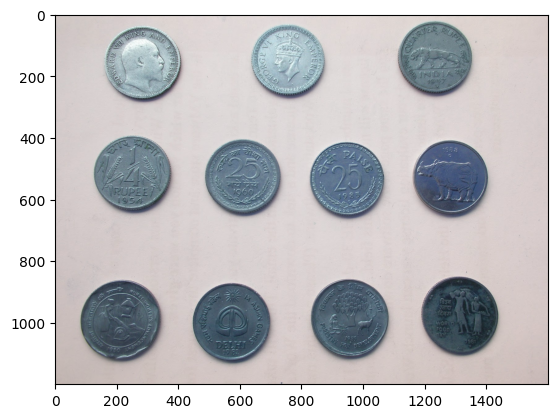

In [3]:
image = cv2.imread("Coins.JPG")
plt.imshow(image)

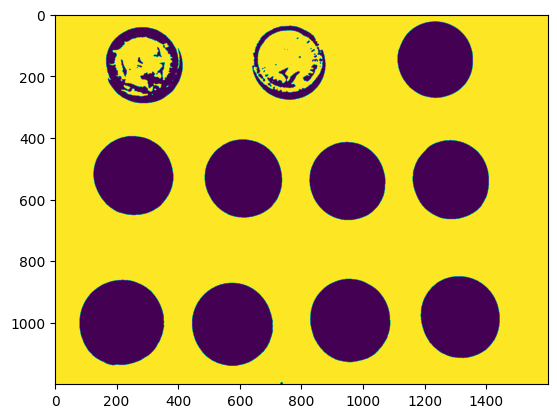

In [52]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# bilateral = cv2.bilateralFilter(gray, 5, 21, 21)
# plt.imshow(bilateral)
blurred = cv2.GaussianBlur(gray, (13, 13), 0)
median = cv2.medianBlur(blurred, 3)
thresh = cv2.threshold(median, 178, 181, cv2.THRESH_BINARY)[1]
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 0), (1000, 360), 255, -1)
masked = cv2.bitwise_and(image, image, mask= mask)
gray_mask = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)
blurred_mask = cv2.GaussianBlur(gray_mask, (99, 99), 0)
median_mask = cv2.medianBlur(blurred_mask, 21)
thresh_mask = cv2.threshold(median_mask, 191, 0, cv2.THRESH_BINARY)[1]
merged = cv2.bitwise_or(thresh, thresh_mask)

plt.imshow(merged)

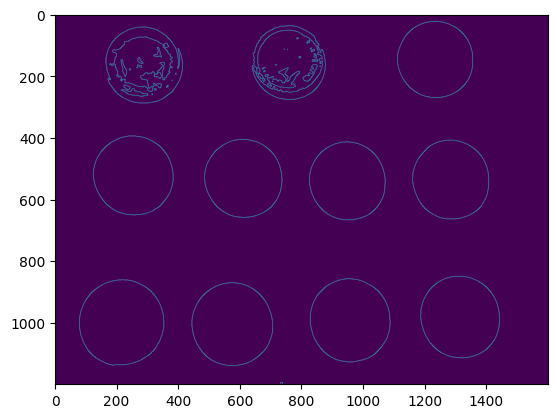

In [53]:
edged = cv2.Canny(thresh, 100, 10)
plt.imshow(edged)

I count 53 coins in this image


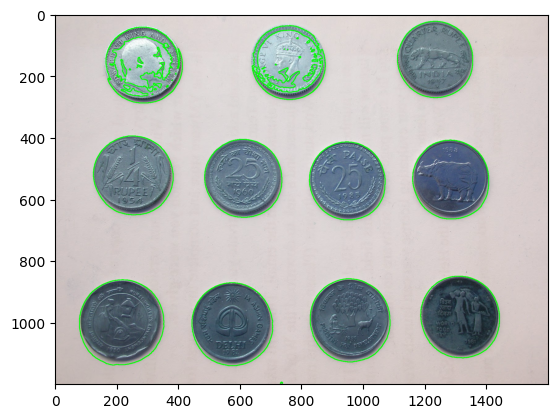

In [54]:
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, 
                                cv2.CHAIN_APPROX_SIMPLE)

print("I count {} coins in this image".format(len(cnts)))
coins = image.copy()
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)
plt.imshow(coins)

[array([[[ 735, 1193]],
 
        [[ 734, 1194]],
 
        [[ 733, 1194]],
 
        [[ 732, 1195]],
 
        [[ 732, 1196]],
 
        [[ 731, 1197]],
 
        [[ 731, 1199]],
 
        [[ 731, 1197]],
 
        [[ 735, 1193]],
 
        [[ 738, 1196]],
 
        [[ 738, 1199]],
 
        [[ 738, 1195]],
 
        [[ 737, 1194]],
 
        [[ 736, 1194]]], dtype=int32),
 array([[[ 565,  871]],
 
        [[ 564,  872]],
 
        [[ 556,  872]],
 
        [[ 555,  873]],
 
        [[ 550,  873]],
 
        [[ 549,  874]],
 
        [[ 546,  874]],
 
        [[ 545,  875]],
 
        [[ 542,  875]],
 
        [[ 541,  876]],
 
        [[ 538,  876]],
 
        [[ 537,  877]],
 
        [[ 535,  877]],
 
        [[ 534,  878]],
 
        [[ 532,  878]],
 
        [[ 531,  879]],
 
        [[ 530,  879]],
 
        [[ 529,  880]],
 
        [[ 527,  880]],
 
        [[ 526,  881]],
 
        [[ 525,  881]],
 
        [[ 524,  882]],
 
        [[ 522,  882]],
 
        [[ 521,  883]],
 